In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
df = pd.read_csv('Smoking.csv')

In [3]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [4]:
df.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [5]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [6]:
x = df.drop('smoker',axis=1)
y = df['smoker']

# Label Encoder

In [7]:
for column in x.columns:
    if is_numeric_dtype(x[column]):
        continue
    else:
        le = LabelEncoder()
        x[column] = le.fit_transform(x[column])

In [8]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Split dataset

In [9]:
xtrain, xtest, ytrain, ytest = tts(x,y, test_size = 0.30,random_state = 1)

# Decision tree classifier

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf1 = DecisionTreeClassifier()

In [12]:
clf.fit(x,y)

DecisionTreeClassifier()

In [13]:
clf.predict([[2,18,1,23,3]])

array(['yes'], dtype=object)

In [14]:
clf1.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [21]:
testing = clf1.predict(xtest)

In [22]:
np.array(ytest)

array(['no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',

In [16]:
clf1.predict(xtrain)

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'yes', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'yes',
       'yes', 'no', 'yes', 'no', 'no', 'yes', 'no', 'no', 

In [17]:
clf1.score(xtest,ytest)

0.664179104477612

[Text(380.6244544204401, 638.73, 'sex <= 0.5\ngini = 0.326\nsamples = 1338\nvalue = [1064, 274]'),
 Text(182.28609793526786, 611.5500000000001, 'bmi <= 22.995\ngini = 0.287\nsamples = 662\nvalue = [547, 115]'),
 Text(35.942602040816325, 584.37, 'children <= 1.5\ngini = 0.413\nsamples = 72\nvalue = [51, 21]'),
 Text(16.369897959183675, 557.19, 'bmi <= 21.61\ngini = 0.343\nsamples = 50\nvalue = [39, 11]'),
 Text(8.540816326530614, 530.01, 'region <= 0.5\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(5.6938775510204085, 502.83000000000004, 'bmi <= 20.045\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(2.8469387755102042, 475.65000000000003, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(8.540816326530614, 475.65000000000003, 'bmi <= 20.378\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(5.6938775510204085, 448.47, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(11.387755102040817, 448.47, 'age <= 28.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(8.540816326530614,

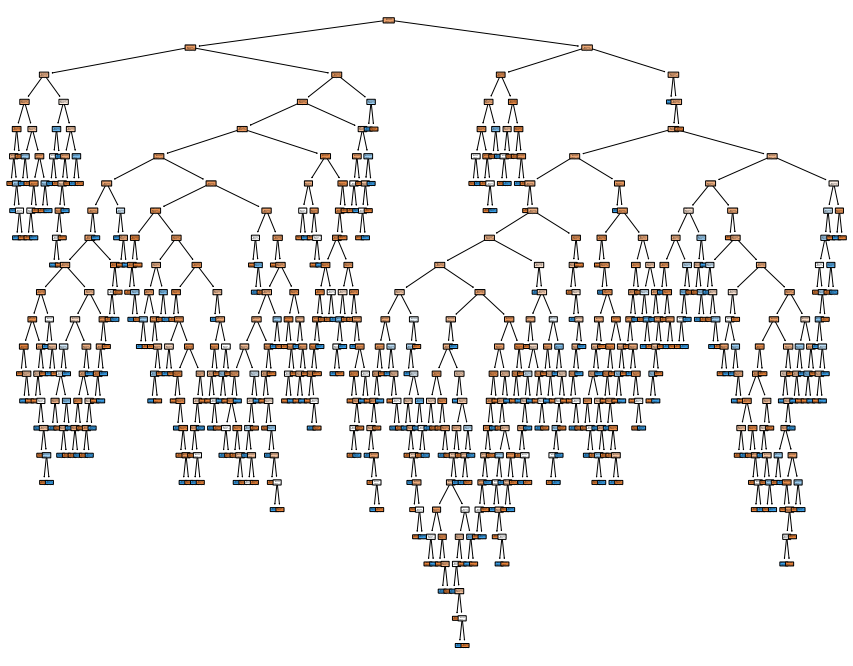

In [18]:
plt.figure(figsize=(15,12))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

In [20]:
ytrain.value_counts()


no     743
yes    193
Name: smoker, dtype: int64

In [23]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, plot_roc_curve

In [25]:
print(classification_report(ytest, testing))

              precision    recall  f1-score   support

          no       0.80      0.78      0.79       321
         yes       0.20      0.22      0.21        81

    accuracy                           0.66       402
   macro avg       0.50      0.50      0.50       402
weighted avg       0.68      0.66      0.67       402



In [26]:
xtest.shape

(402, 5)

In [27]:
ytest.shape

(402,)

In [33]:
con_mat = (confusion_matrix(ytest, testing))
con_mat

array([[249,  72],
       [ 63,  18]], dtype=int64)

In [34]:
import seaborn as sns

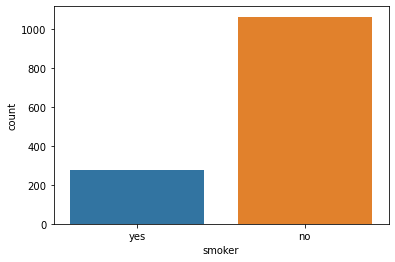

In [35]:
sns.countplot(x = 'smoker', data = df)

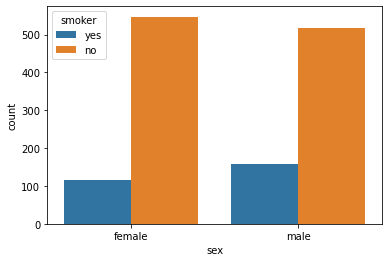

In [36]:
sns.countplot(x = 'sex', data = df, hue = 'smoker')

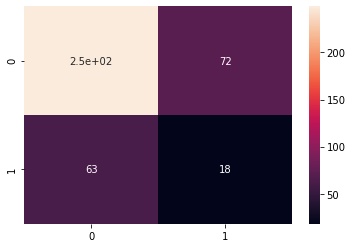

In [37]:
sns.heatmap(con_mat, annot = True)

In [40]:
tp,fn,fp,tn= confusion_matrix(ytest, testing).reshape(-1)

In [41]:
tp

249

In [42]:
fn

72

In [43]:
fp

63

In [44]:
tn

18

In [45]:
acc = (tp+tn)/(tp+fn+fp+tn)

In [46]:
acc

0.664179104477612

In [47]:
ppv = tp/(tp+fp)
ppv

0.7980769230769231

In [49]:
tpr = tp/(tp+fn)
tpr

0.7757009345794392

In [50]:
fpr= fp/(fp+tn)
fpr

0.7777777777777778

# Roc_curve

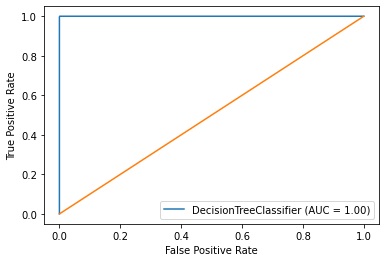

In [62]:
plot_roc_curve(clf,x,y)
plt.plot([0,1],[0,1])

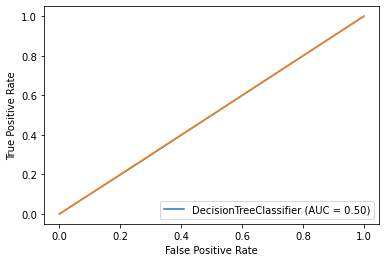

In [61]:
plot_roc_curve(clf1,xtest,ytest)
plt.plot([0,1],[0,1])